### Student Information
Name: Nareekarn Phongthipphithak

Student ID: 107065428

GitHub ID: fernphthak

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

# Take-home HW

In [524]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [525]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [531]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [532]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [533]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

In [534]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [535]:
X['category'] = twenty_train.target

In [536]:
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [537]:
#2 Answer here
X.sample(n=5)

,text,category,category_name
1504,Subject: Re: Death Penalty (was Re: Political ...,0,alt.atheism
1478,From: dr_bobo@ponton.hanse.de (Boris Pruessman...,1,comp.graphics
503,From: sdbsd5@cislabs.pitt.edu (Stephen D Brene...,2,sci.med
517,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
2205,From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden) ...,3,soc.religion.christian


In [540]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [541]:
X_sample = X.sample(n=1000)

In [542]:
len(X_sample)

1000

In [543]:
X_sample[0:5]

,text,category,category_name
2147,From: lasse@mits.mdata.fi (Lasse Reinikainen) ...,1,comp.graphics
189,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
586,From: cobb@alexia.lis.uiuc.edu (Mike Cobb) Sub...,0,alt.atheism
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
2120,From: timmbake@mcl.ucsb.edu (Bake Timmons) Sub...,0,alt.atheism


In [544]:
import matplotlib.pyplot as plt
%matplotlib inline

comp.graphics             267
soc.religion.christian    265
sci.med                   249
alt.atheism               219
Name: category_name, dtype: int64


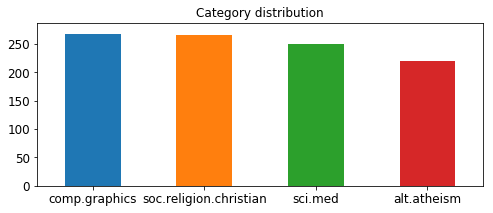

In [546]:
#7 Answer here
upper_bound = max(X_sample.category_name.value_counts()) + 20

print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

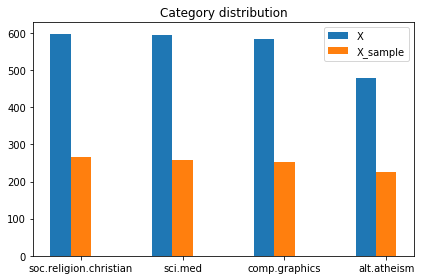

<Figure size 432x288 with 0 Axes>

In [547]:
#8 Answer here
n_groups = 4
y = [599,594,584,480]
z = [265,258,253,225]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
 
rects1 = plt.bar(index, y, bar_width,
                 label='X')
 
rects2 = plt.bar(index + bar_width, z, bar_width,
                 label='X_sample')
 
plt.title('Category distribution')
plt.xticks(index + bar_width, ("soc.religion.christian","sci.med","comp.graphics","alt.atheism"))
plt.legend()
 
plt.tight_layout()
plt.show()
multiple_bars = plt.figure()

In [550]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [551]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [552]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [553]:
#9 Answer here
analyze("".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [554]:
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [561]:
a = X_counts[4:5,0:100].toarray()

In [562]:
a[0][0], a[0][37]

(1, 1)

In [563]:
#10 Answer here
count_vect.inverse_transform(a[0])

[array(['00', '01'], dtype='<U80')]

In [564]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:40]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:40]]
plot_z = X_counts[0:40, 0:40].toarray()

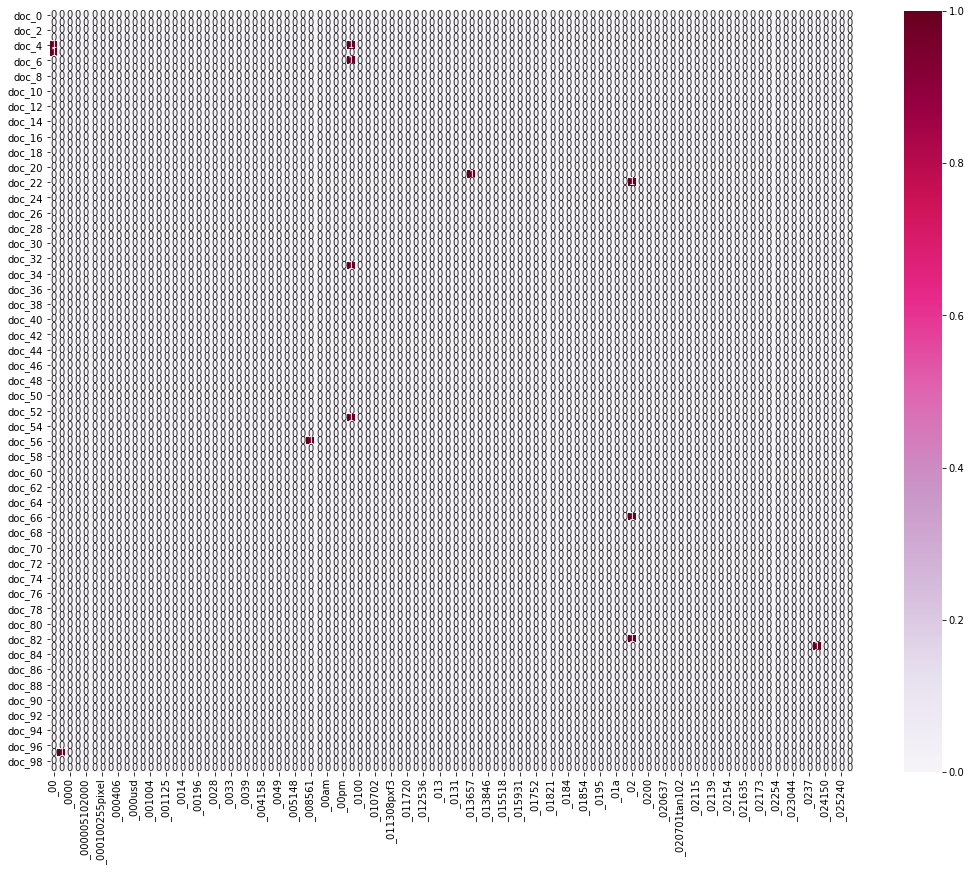

In [566]:
#11 Answer here
import seaborn as sns
plot_x = ["_"+str(i) for i in count_vect.get_feature_names()[0:100]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_z = X_counts[0:100, 0:100].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [567]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

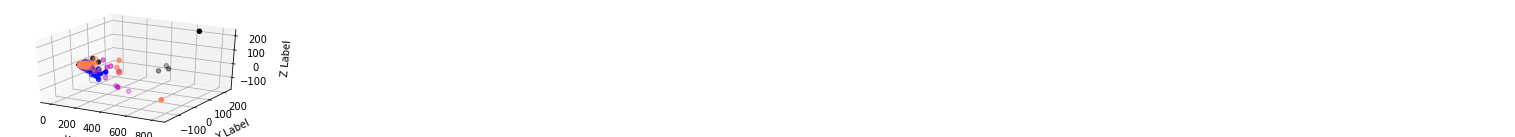

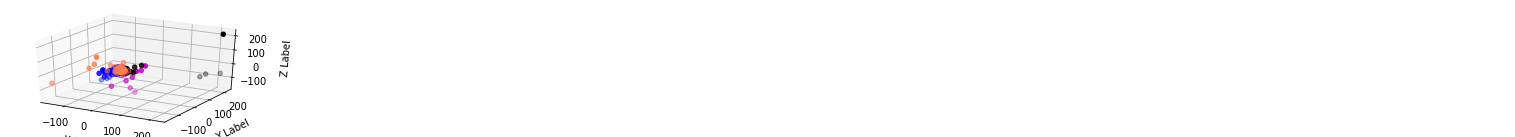

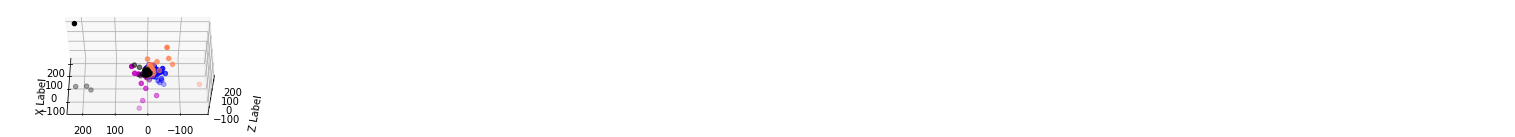

In [570]:
#12 Answer here
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'm']

########## plot 1111111
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(2,2,1, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
        
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

########## plot 2222222222
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(222, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[1]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
        
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

# rotate the axes and update
plt.draw()


########## plot 2222222222
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(2,2,3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[2]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
        
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

# rotate the axes and update
ax.view_init(55, 180)
plt.draw()

In [573]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [574]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [571]:
import plotly
plotly.tools.set_credentials_file(username='n.phthak', api_key='Pto4junfTlHdZfLN3iFT')

import plotly.plotly as py
import plotly.graph_objs as go

In [576]:
#13 Answer here
data = [go.Bar(
            x=["_"+str(i) for i in count_vect.get_feature_names()],
            y=term_frequencies
    )]

py.iplot(data, filename = 'basic-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~n.phthak/0 or inside your plot.ly account where it is named 'basic-line'


/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [577]:
#14 Answer here
data = [go.Bar(
            x=["_"+str(i) for i in count_vect.get_feature_names()[:100]],
            y=term_frequencies[:100]
    )]

py.iplot(data, filename = 'basic-line-sample')

In [583]:
#15 Answer here
data = [go.Bar(
            x=["_"+str(i) for i in count_vect.get_feature_names()[:100]],
            y=sorted(term_frequencies[:100], reverse = True)
    )]

py.iplot(data, filename = 'basic-line-sample')

In [579]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [580]:
mlb.fit(X.category_name)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [581]:
mlb.classes_

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

In [582]:
#16 Answer here
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

# Assignment 1 begin here

In [410]:
### Begin Assignment Here!
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [411]:
import numpy as np
import pandas as pd

In [412]:
#import files

amazon_file = 'amazon_cells_labelled.txt'
amazon = open(amazon_file, mode ='r')

imdb_file = 'imdb_labelled.txt'
imdb = open(imdb_file, mode ='r')

yelp_file = 'yelp_labelled.txt'
yelp = open(yelp_file, mode ='r')

In [413]:
#assign the variables
amazon.seek(0)
amazon_array = amazon.readlines()

imdb.seek(0)
im_array = imdb.readlines()

yelp.seek(0)
yelp_array = yelp.readlines()

In [599]:
#example display
yelp_array[:10]

['Wow... Loved this place.\t1\n',
 'Crust is not good.\t0\n',
 'Not tasty and the texture was just nasty.\t0\n',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\n',
 'The selection on the menu was great and so were the prices.\t1\n',
 'Now I am getting angry and I want my damn pho.\t0\n',
 "Honeslty it didn't taste THAT fresh.)\t0\n",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\n',
 'The fries were great too.\t1\n',
 'A great touch.\t1\n']

In [415]:
type(amazon)
type(imdb)
type(yelp)

_io.TextIOWrapper

In [416]:
#combine 3 text together
text = np.concatenate((amazon_array, im_array, yelp_array),axis=0)

In [417]:
text

array(['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
       'Good case, Excellent value.\t1\n', 'Great for the jawbone.\t1\n',
       ..., 'Overall I was not impressed and would not go back.\t0\n',
       "The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.\t0\n",
       "Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.\t0\n"],
      dtype='<U482')

In [418]:
len(text)

3000

In [419]:
#arrays to store elements
text_array = []
feedback_array = []

for element in text:
    i = element.split('\t')
    text_array += [i[0]]
    feedback_array += [i[1].strip('\n')]

In [420]:
text_array[:10]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say, I wasted my money.',
 'What a waste of money and time!.']

In [421]:
feedback_array[:10]

['0', '1', '1', '0', '1', '0', '0', '1', '0', '0']

In [422]:
company_array = []

for n in range(1000):
    company_array += ["amazon"]

for n in range(1000,2000):
    company_array += ["imdb"]
    
for n in range(2000,3000):
    company_array += ["yelp"]

In [423]:
company_array[998:1003]

['amazon', 'amazon', 'imdb', 'imdb', 'imdb']

In [424]:
len(company_array)

3000

In [425]:
text_ = {'Text': text_array, 'Feedback': feedback_array, 'Company': company_array}
text_data = pd.DataFrame(data = text_)

In [426]:
text_data[:10]

,Text,Feedback,Company
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon
9,What a waste of money and time!.,0,amazon


In [427]:
text_data.sample(10)

,Text,Feedback,Company
219,I'm still infatuated with this phone.,1,amazon
2571,We recently witnessed her poor quality of mana...,0,yelp
2523,first time there and might just be the last.,0,yelp
1600,Perabo has a nice energy level and is obviousl...,1,imdb
1470,Even the squibs look awful.,0,imdb
2123,"The guys all had steaks, and our steak loving ...",1,yelp
2365,"I find wasting food to be despicable, but this...",0,yelp
164,I still maintain that monkeys shouldn't make h...,0,amazon
1018,It's practically perfect in all of them  a tr...,1,imdb
990,I'm really disappointed all I have now is a ch...,0,amazon


In [428]:
text_data.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [429]:
sum(text_data.duplicated())

17

In [430]:
# delete the duplicate data
text_data.drop_duplicates(keep=False, inplace=True)

In [431]:
sum(text_data.duplicated())

0

In [432]:
len(text_data)

2966

imdb      994
yelp      992
amazon    980
Name: Company, dtype: int64


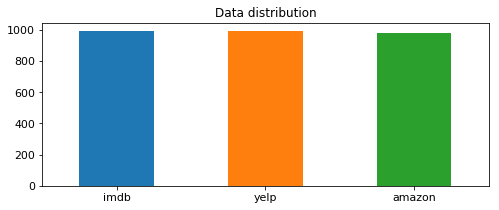

In [433]:
import matplotlib.pyplot as plt
%matplotlib inline

print(text_data.Company.value_counts())

upper_bound = max(text_data.Company.value_counts()) + 50

text_data.Company.value_counts().plot(kind = 'bar',
                                    title = 'Data distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

yelp      349
imdb      335
amazon    316
Name: Company, dtype: int64


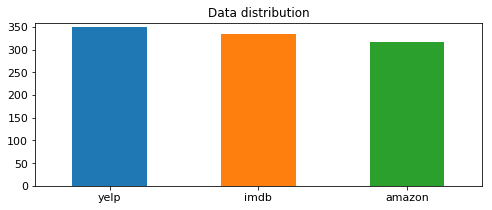

In [434]:
import matplotlib.pyplot as plt
%matplotlib inline

data_sample = text_data.sample(1000)

print(data_sample.Company.value_counts())

upper_bound = max(data_sample.Company.value_counts()) + 10

data_sample.Company.value_counts().plot(kind = 'bar',
                                    title = 'Data distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

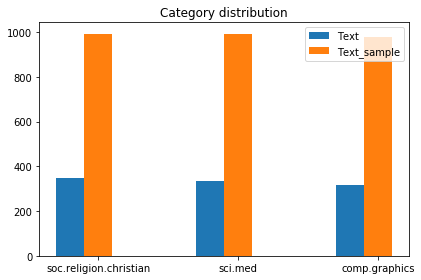

<Figure size 432x288 with 0 Axes>

In [435]:
n_groups = 3
y = data_sample.Company.value_counts()
z = text_data.Company.value_counts()
 

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
 
rects1 = plt.bar(index, y, bar_width,
                 label='Text')
 
rects2 = plt.bar(index + bar_width, z, bar_width,
                 label='Text_sample')
 
plt.title('Category distribution')
plt.xticks(index + bar_width, ("soc.religion.christian","sci.med","comp.graphics","alt.atheism"))
plt.legend()
 
plt.tight_layout()
plt.show()
multiple_bars = plt.figure()

In [436]:
text_array_split = []

for n in text_array[:10]:
    nn = n.split(' ')
    text_array_split += [nn[0]]

In [437]:
text_array_split

['So', 'Good', 'Great', 'Tied', 'The', 'I', 'If', 'If', 'Needless', 'What']

In [438]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [507]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
text_array_count = CV.fit_transform(text_data.Text)

In [440]:
text_array_count

<2966x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 31452 stored elements in Compressed Sparse Row format>

In [441]:
text_array_count.shape

(2966, 5153)

In [442]:
analyze = CV.build_analyzer()
analyze("".join(list(text_array[:1])))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [443]:
#arrange the words in alphabet
CV.get_feature_names()[0:20]

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980']

In [444]:
text_array_count[9:10,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [445]:
y = text_array_count[9:10,0:100].toarray()

In [446]:
y[0][91]

0

In [447]:
CV.inverse_transform(y[0])

[array([], dtype='<U17')]

# TF-IDF features

In [448]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
tf_technique = tfid.fit_transform(text_data.Text)

In [449]:
print(tfid.get_feature_names()[:100])

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations']


In [450]:
tf_technique[:10, :5].toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [451]:
text_array[:1]

['So there is no way for me to plug it in here in the US unless I go by a converter.']

In [452]:
#this is array for 1st sentence -- column by words and row by frequency
#when compare 2 sentences -- use array to compare

text_array_count[:1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [453]:
#Distance Similarities
from sklearn.metrics.pairwise import cosine_similarity

In [454]:
# -- 1st method -- cosine_similarity 
#1st sentence
text_array[13:14]

['Very good quality though']

In [455]:
#2nd sentence
text_array[17:18]

['So Far So Good!.']

In [456]:
#Compare similarity with CountVectorizer
cosine_similarity(text_array_count[17:18].toarray(), text_array_count[13:14].toarray())

array([[0.20412415]])

In [457]:
#Compare similarity with TF-IDF features
cosine_similarity(tf_technique[17:18].toarray(), tf_technique[13:14].toarray())

array([[0.1363893]])

In [458]:
# -- 2nd method pearson 
#.ravel return
from scipy.stats import pearsonr

In [459]:
first = text_array_count[17:18].toarray().ravel()
second = text_array_count[13:14].toarray().ravel()

result, p_value = pearsonr(first, second)

In [460]:
#with CountVictorizer
result

0.2036220615269497

In [461]:
first_idf = tf_technique[17:18].toarray().ravel()
second_idf = tf_technique[13:14].toarray().ravel()

result_idf, p_value = pearsonr(first_idf, second_idf)

In [462]:
#with TF-IDF feartures
result_idf

0.13584800792539825

#  Naive Bayes classifier 

In [463]:
from sklearn.naive_bayes import MultinomialNB

In [508]:
#Naive Bayes Multinomial with CountVect
first = text_array_count.toarray()
second = text_data['Feedback']

mnb_cv = MultinomialNB()
mnb_cv.fit(first, second)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [494]:
mnb_cv.predict(CV.transform(["Good case, Excellent"]))

array(['1'], dtype='<U1')

In [495]:
#Naive Bayes Multinomial with TF-IDF
first_idf = tf_technique.toarray()
second_idf = text_data['Feedback']

mnb_idf = MultinomialNB()
mnb_idf.fit(first_idf, second_idf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [496]:
mnb_idf.predict(tfid.transform(["Good case, Excellent"]))

array(['1'], dtype='<U1')

# Comparison between real data & prediction -- TF-IDF

In [468]:
text

array(['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
       'Good case, Excellent value.\t1\n', 'Great for the jawbone.\t1\n',
       ..., 'Overall I was not impressed and would not go back.\t0\n',
       "The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.\t0\n",
       "Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.\t0\n"],
      dtype='<U482')

In [469]:
text_data_for_prediction = pd.DataFrame(data = text_)
text_data_for_prediction.drop_duplicates(keep=False, inplace=True)

In [470]:
text_data_for_prediction[:10]

,Text,Feedback,Company
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon
9,What a waste of money and time!.,0,amazon


In [471]:
len(text_data_for_prediction)

2966

In [598]:
#comparison with TF-IDF data

prediction_array = []

for n in text_data_for_prediction.Text:
    #print(n.__class__)
    prediction1 = mnb_idf.predict(tfid.transform([n]))
    prediction2 = prediction1[0]
    prediction_array += [prediction2]
                         
print(prediction_array[:10])

['0', '1', '1', '0', '1', '0', '0', '1', '0', '0']


In [498]:
text_data_for_prediction["Prediction"] = prediction_array

In [499]:
text_data_for_prediction[:10]

,Text,Feedback,Company,Prediction,Compare
0,So there is no way for me to plug it in here i...,0,amazon,0,1
1,"Good case, Excellent value.",1,amazon,1,1
2,Great for the jawbone.,1,amazon,1,1
3,Tied to charger for conversations lasting more...,0,amazon,0,1
4,The mic is great.,1,amazon,1,1
5,I have to jiggle the plug to get it to line up...,0,amazon,0,1
6,If you have several dozen or several hundred c...,0,amazon,0,1
7,If you are Razr owner...you must have this!,1,amazon,1,1
8,"Needless to say, I wasted my money.",0,amazon,0,1
9,What a waste of money and time!.,0,amazon,0,1


In [500]:
compare_array = []

for index, row in text_data_for_prediction.iterrows():
    if row['Feedback'] == row['Prediction']:
        compare_array += [1] #1 means the prediction is CORRECT
    else:
        compare_array += [0] #0 means the prediction is WRONG

In [501]:
text_data_for_prediction["Compare"] = compare_array

In [502]:
text_data_for_prediction[:10]

,Text,Feedback,Company,Prediction,Compare
0,So there is no way for me to plug it in here i...,0,amazon,0,1
1,"Good case, Excellent value.",1,amazon,1,1
2,Great for the jawbone.,1,amazon,1,1
3,Tied to charger for conversations lasting more...,0,amazon,0,1
4,The mic is great.,1,amazon,1,1
5,I have to jiggle the plug to get it to line up...,0,amazon,0,1
6,If you have several dozen or several hundred c...,0,amazon,0,1
7,If you are Razr owner...you must have this!,1,amazon,1,1
8,"Needless to say, I wasted my money.",0,amazon,0,1
9,What a waste of money and time!.,0,amazon,0,1


In [503]:
Total_compare = text_data_for_prediction['Compare'].sum()
print (Total_compare)

2826


In [504]:
#the sentence that the prediction is WRONG

for index, row in text_data_for_prediction.iterrows():
    if row.Compare == 0:
        print (row.Text)

good protection and does not make phone too bulky.
Not a good bargain.
Will order from them again!
I've only had my bluetooth for a few weeks, but I really like it.
It is so small and you don't even realize that it is there after a while of getting used to it.
I was not happy with this item.
I've had this bluetoooth headset for some time now and still not comfortable with the way it fits on the ear.
I usually don't like headbands but this one is very lightweight & doesn't mess up my hair.
I have had this phone for over a year now, and I will tell you, its not that great.
It defeats the purpose of a bluetooth headset.
Phone now holds charge like it did when it was new.
I was able to do voice dialing in the car with no problem.
Was not happy.
Excellent starter wireless headset.
The loudspeaker option is great, the bumpers with the lights is very ... appealing.
But it does get better reception and clarity than any phone I've had before.
Its not user friendly.
Keep up the good work Amazon!

# Comparison between real data & prediction -- CountVectorizer

In [509]:
text_data_for_prediction_cv = pd.DataFrame(data = text_)
text_data_for_prediction_cv.drop_duplicates(keep=False, inplace=True)

In [510]:
len(text_data_for_prediction_cv)

2966

In [597]:
#comparison with Countvitorizer data
prediction_array_cv = []

for n in text_data_for_prediction_cv.Text:
    #print(n.__class__)
    prediction3 = mnb_cv.predict(CV.transform([n]))
    prediction4 = prediction3[0]
    prediction_array_cv += [prediction4]
                         
print(prediction_array_cv[:10])

['0', '1', '1', '0', '1', '0', '0', '1', '0', '0']


In [513]:
text_data_for_prediction_cv["Prediction_CV"] = prediction_array_cv

In [514]:
compare_array_cv = []

for index, row in text_data_for_prediction_cv.iterrows():
    if row['Feedback'] == row['Prediction_CV']:
        compare_array_cv += [1] #1 means the prediction is CORRECT
    else:
        compare_array_cv += [0] #0 means the prediction is WRONG

In [515]:
text_data_for_prediction_cv["Compare_CV"] = compare_array_cv

In [516]:
text_data_for_prediction_cv[:10]

,Text,Feedback,Company,Prediction_CV,Compare_CV
0,So there is no way for me to plug it in here i...,0,amazon,0,1
1,"Good case, Excellent value.",1,amazon,1,1
2,Great for the jawbone.,1,amazon,1,1
3,Tied to charger for conversations lasting more...,0,amazon,0,1
4,The mic is great.,1,amazon,1,1
5,I have to jiggle the plug to get it to line up...,0,amazon,0,1
6,If you have several dozen or several hundred c...,0,amazon,0,1
7,If you are Razr owner...you must have this!,1,amazon,1,1
8,"Needless to say, I wasted my money.",0,amazon,0,1
9,What a waste of money and time!.,0,amazon,0,1


In [517]:
Total_compare_cv = text_data_for_prediction_cv['Compare_CV'].sum()
print (Total_compare_cv)

2803


In [596]:
#the sentence that the prediction is WRONG

for index, row in text_data_for_prediction_cv.iterrows():
    if row.Compare_CV == 0:
        print (row.Text)

good protection and does not make phone too bulky.
Not a good bargain.
Will order from them again!
I've only had my bluetooth for a few weeks, but I really like it.
It is so small and you don't even realize that it is there after a while of getting used to it.
I was not happy with this item.
I've had this bluetoooth headset for some time now and still not comfortable with the way it fits on the ear.
I usually don't like headbands but this one is very lightweight & doesn't mess up my hair.
I have had this phone for over a year now, and I will tell you, its not that great.
It defeats the purpose of a bluetooth headset.
First of all, it doesn't wear well.
Phone now holds charge like it did when it was new.
I was able to do voice dialing in the car with no problem.
Was not happy.
Excellent starter wireless headset.
The loudspeaker option is great, the bumpers with the lights is very ... appealing.
Better than you'd expect.
Oh and I forgot to also mention the weird color effect it has on yo

# Summarize